## Customer Churn Analysis
### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 


### Importing all the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler

from scipy.stats import zscore
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import cross_val_score,GridSearchCV, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix, plot_roc_curve

### Reading the data
Let us import the csv file and make it feasible for statistical and exploratory data analysis

In [3]:
df = pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Exploratory Data Analysis

Let us understand the data and what each record in row and column is about.
Here each column consist of details of customer information which is recorded by company during the service.
There are 4 type of information,
1. Services used by customer.
2. Customer Demographic information (basic details)
3. Customer churn Details.
4. Customer Account information.

### Let us check about the datatypes present in the data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
print('Attributes name:\n',df.columns)

print('#'*60,'\n Check for null values: \n',df.isnull().sum())


Attributes name:
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
############################################################ 
 Check for null values: 
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
for i in df.columns:
    print("Name of Attribue:", i)
    print(df[i].value_counts())
    print('#'*60)

Name of Attribue: customerID
3275-RHRNE    1
9134-CEQMF    1
8510-AWCXC    1
1866-OBPNR    1
5959-BELXA    1
             ..
7156-MHUGY    1
8773-HHUOZ    1
7718-RXDGG    1
0285-INHLN    1
9424-CMPOG    1
Name: customerID, Length: 7043, dtype: int64
############################################################
Name of Attribue: gender
Male      3555
Female    3488
Name: gender, dtype: int64
############################################################
Name of Attribue: SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
############################################################
Name of Attribue: Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
############################################################
Name of Attribue: Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
############################################################
Name of Attribue: tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51


#### 1. There are no null values in the table but we need to check if there are any hidden nulls like empty spaces, or zero values
#### 2. There are 15 categorical columns which are to be treated and Encoded into Numerical values.

## Data Visualisation
### Univariate Analysis

Number of male: 3555
Number of female: 3488
Number of Senior Citizen: 1142
Number of Non-Senior Citizen: 5901


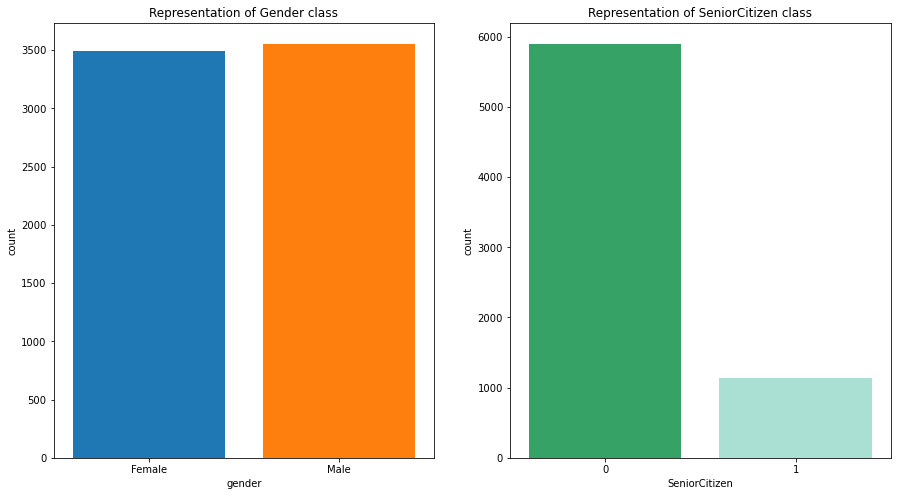

In [8]:
print('Number of male:',df[df['gender']=='Male']['customerID'].count())
print('Number of female:',df[df['gender']=='Female']['customerID'].count())

print('Number of Senior Citizen:',df[df['SeniorCitizen']==1]['customerID'].count())
print('Number of Non-Senior Citizen:',df[df['SeniorCitizen']==0]['customerID'].count())

plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['gender'],saturation=1)
plt.title('Representation of Gender class')

ax = plt.subplot(1,2,2)
sns.countplot(df['SeniorCitizen'],saturation=1, palette='BuGn_r')
plt.title('Representation of SeniorCitizen class')

plt.show()

#### 1. There is equal gender ration who has opted for the services
#### 2. There are only 16% of senior citizen who opted for services.

Number of people having Partner: 3402
Number of people not having Partner: 3641
Number of people having Dependents: 2110
Number of people having no Dependents: 4933


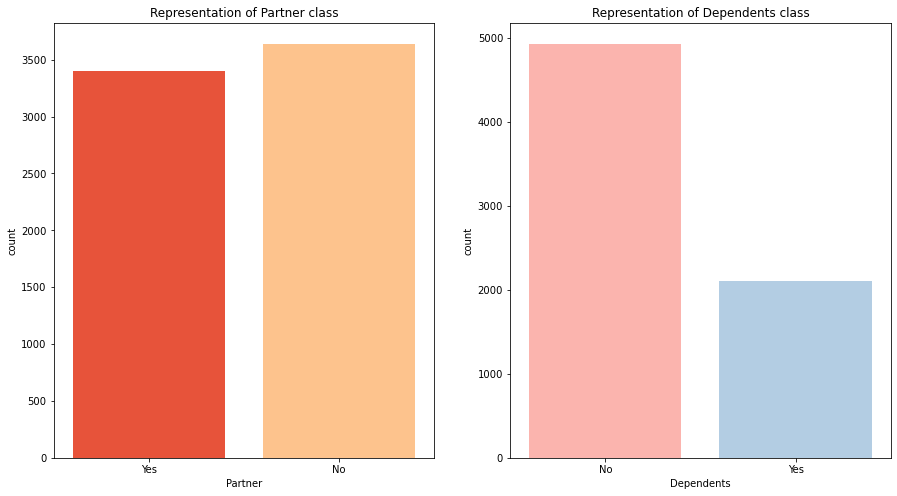

In [9]:
print('Number of people having Partner:',df[df['Partner']=='Yes']['customerID'].count()) 
print('Number of people not having Partner:',df[df['Partner']=='No']['customerID'].count()) 

print('Number of people having Dependents:',df[df['Dependents']=='Yes']['customerID'].count()) 
print('Number of people having no Dependents:',df[df['Dependents']=='No']['customerID'].count()) 

plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['Partner'],saturation=1, palette='OrRd_r')
plt.title('Representation of Partner class')

ax = plt.subplot(1,2,2)
sns.countplot(df['Dependents'],saturation=1, palette='Pastel1')
plt.title('Representation of Dependents class')

plt.show()

#### 1. There are nearly equal ration of people who have partner and not having one.
#### 2. There are only 30% of people who choose service have dependents.

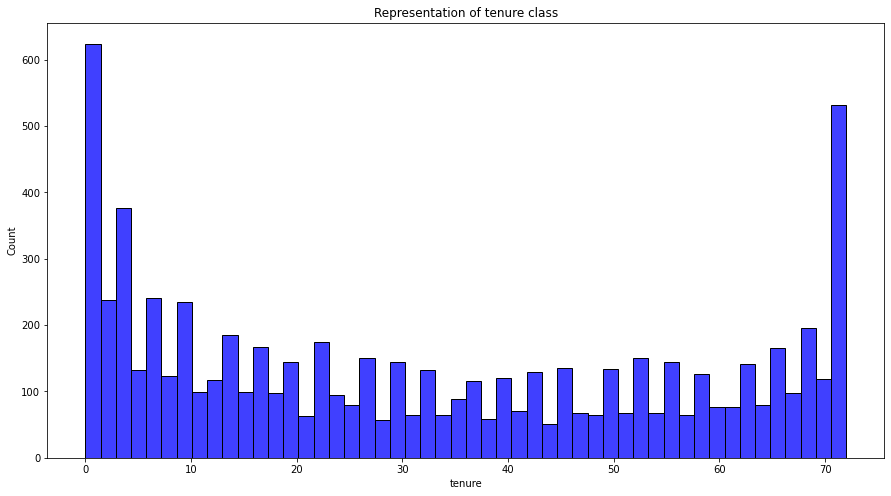

In [10]:
plt.figure(figsize=(15,8), facecolor='white')
sns.histplot(df['tenure'], bins=50, color='blue')
plt.title('Representation of tenure class')
plt.show()

Number of people having PhoneService: 6361
Number of people not having PhoneService: 682
Number of people having DSL: 2421
Number of people having Fiber Optics: 3096
Number of people having no InternetService: 1526


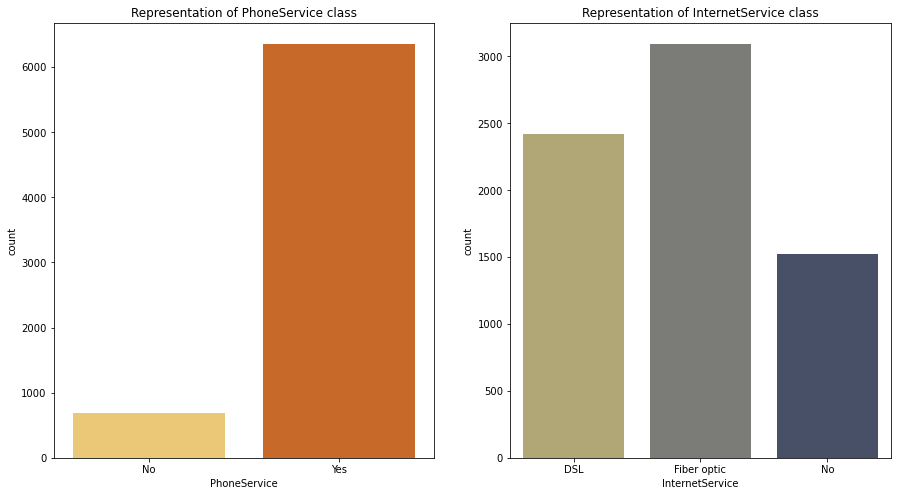

In [11]:
print('Number of people having PhoneService:',df[df['PhoneService']=='Yes']['customerID'].count()) 
print('Number of people not having PhoneService:',df[df['PhoneService']=='No']['customerID'].count()) 

print('Number of people having DSL:',df[df['InternetService']=='DSL']['customerID'].count()) 
print('Number of people having Fiber Optics:',df[df['InternetService']=='Fiber optic']['customerID'].count()) 
print('Number of people having no InternetService:',df[df['InternetService']=='No']['customerID'].count()) 

plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['PhoneService'],palette='YlOrBr') 
plt.title('Representation of PhoneService class')

ax = plt.subplot(1,2,2)
sns.countplot(df['InternetService'],palette='cividis_r')
plt.title('Representation of InternetService class')

plt.show()

#### 1. 21% of the customer data, donot have Phone Service, they are not contribution for any other service as well.
#### 2. 79% of customer of overall has Internet Service, and 44% of them choose for Fiber Optics, and 35% choose for DSL Internet Service.

Number of people having MultipleLines: 2971
Number of people not having MultipleLines: 3390
Number of people not having phone service: 682


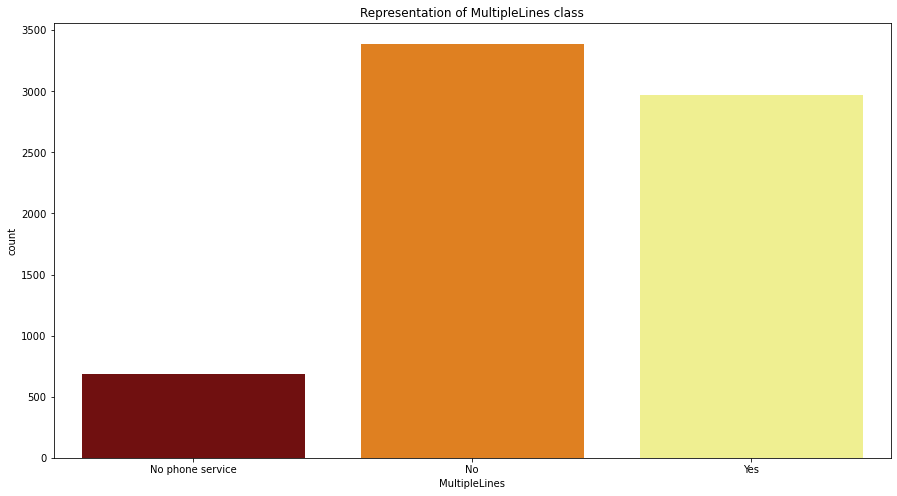

In [12]:
print('Number of people having MultipleLines:',df[df['MultipleLines']=='Yes']['customerID'].count()) 
print('Number of people not having MultipleLines:',df[df['MultipleLines']=='No']['customerID'].count()) 
print('Number of people not having phone service:',df[df['MultipleLines']=='No phone service']['customerID'].count()) 
 

plt.figure(figsize=(15,8), facecolor='white')
sns.countplot(df['MultipleLines'],palette='afmhot')
plt.title('Representation of MultipleLines class')
plt.show()

#### 1. Only 40% of total customer has multiple lines, and 48% donot opt for multiple lines, 22% donot have phone service.

Number of people having OnlineSecurity: 2019
Number of people not having OnlineSecurity: 3498
Number of people having No internet service: 1526
Number of people having OnlineBackup: 2429
Number of people not having OnlineBackup: 3088
Number of people No internet service: 1526


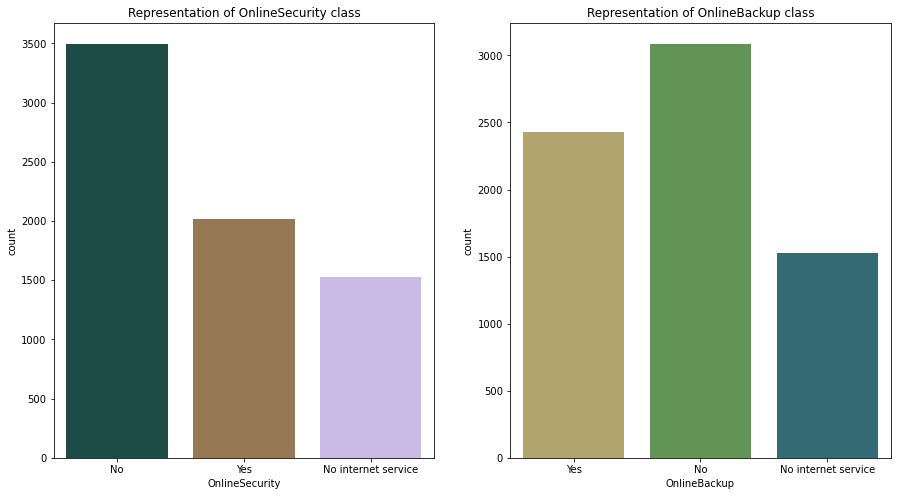

In [13]:
print('Number of people having OnlineSecurity:',df[df['OnlineSecurity']=='Yes']['customerID'].count()) 
print('Number of people not having OnlineSecurity:',df[df['OnlineSecurity']=='No']['customerID'].count()) 
print('Number of people having No internet service:',df[df['OnlineSecurity']=='No internet service']['customerID'].count()) 

print('Number of people having OnlineBackup:',df[df['OnlineBackup']=='Yes']['customerID'].count()) 
print('Number of people not having OnlineBackup:',df[df['OnlineBackup']=='No']['customerID'].count())  
print('Number of people No internet service:',df[df['OnlineBackup']=='No internet service']['customerID'].count()) 


plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['OnlineSecurity'],palette='cubehelix')
plt.title('Representation of OnlineSecurity class')

ax = plt.subplot(1,2,2)
sns.countplot(df['OnlineBackup'],palette='gist_earth_r')
plt.title('Representation of OnlineBackup class')

plt.show()

#### 1. Only 28% of total customer choose Online Security service, and 49% donot choose online Security service.
#### 2. And 34% of customer choose online backup service, 44% donot choose, and 22% donot have Internet Service.

Number of people having DeviceProtection: 2422
Number of people not having DeviceProtection: 3095
Number of people having No internet service: 1526
Number of people having TechSupport: 2044
Number of people not having TechSupport: 3473
Number of people No internet service: 1526


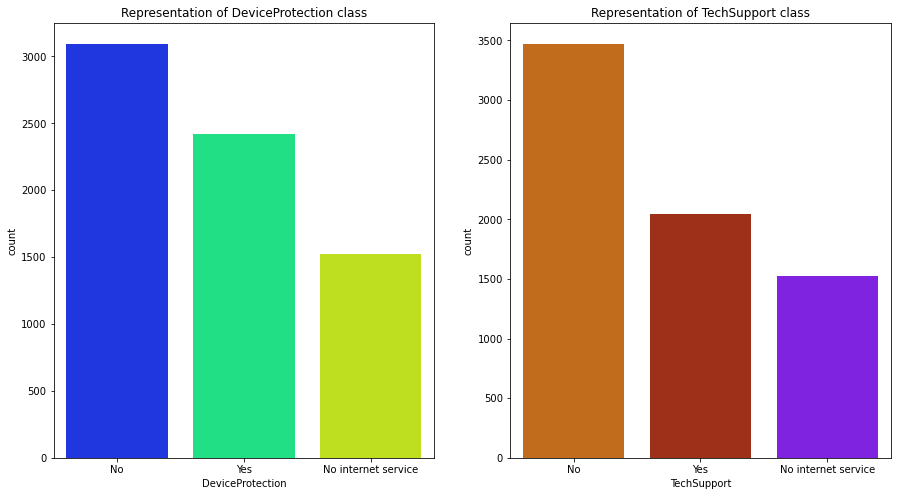

In [14]:
print('Number of people having DeviceProtection:',df[df['DeviceProtection']=='Yes']['customerID'].count()) 
print('Number of people not having DeviceProtection:',df[df['DeviceProtection']=='No']['customerID'].count()) 
print('Number of people having No internet service:',df[df['DeviceProtection']=='No internet service']['customerID'].count()) 

print('Number of people having TechSupport:',df[df['TechSupport']=='Yes']['customerID'].count()) 
print('Number of people not having TechSupport:',df[df['TechSupport']=='No']['customerID'].count())  
print('Number of people No internet service:',df[df['TechSupport']=='No internet service']['customerID'].count()) 


plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['DeviceProtection'],palette='gist_rainbow_r')
plt.title('Representation of DeviceProtection class')

ax = plt.subplot(1,2,2)
sns.countplot(df['TechSupport'],palette='gnuplot_r')
plt.title('Representation of TechSupport class')

plt.show()

#### 1. 29% of customer Choose Techsupport service from the company,
#### 2. 34% customer choose Device protection service.

Number of people having StreamingTV: 2707
Number of people not having StreamingTV: 2810
Number of people having No internet service: 1526
Number of people having TechSupport: 2732
Number of people not having TechSupport: 2785
Number of people No internet service: 1526


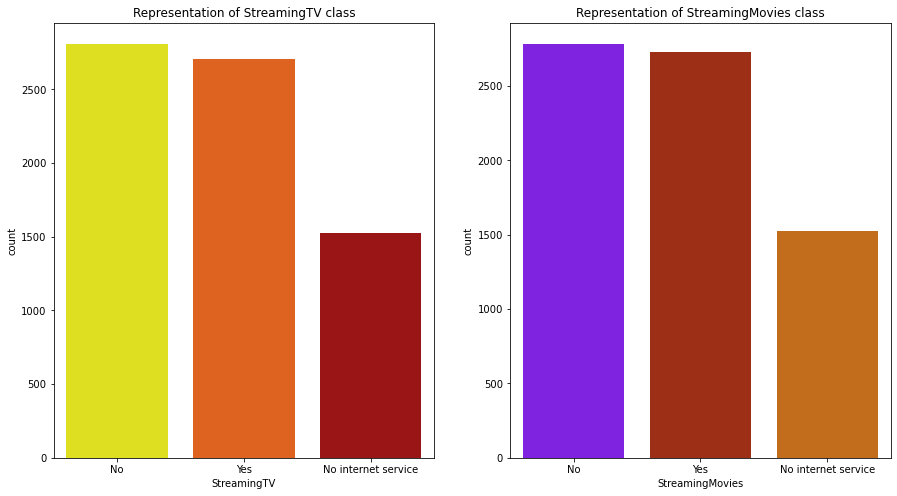

In [15]:
print('Number of people having StreamingTV:',df[df['StreamingTV']=='Yes']['customerID'].count()) 
print('Number of people not having StreamingTV:',df[df['StreamingTV']=='No']['customerID'].count()) 
print('Number of people having No internet service:',df[df['StreamingTV']=='No internet service']['customerID'].count()) 

print('Number of people having TechSupport:',df[df['StreamingMovies']=='Yes']['customerID'].count()) 
print('Number of people not having TechSupport:',df[df['StreamingMovies']=='No']['customerID'].count())  
print('Number of people No internet service:',df[df['StreamingMovies']=='No internet service']['customerID'].count()) 


plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['StreamingTV'],palette='hot_r')
plt.title('Representation of StreamingTV class')


ax = plt.subplot(1,2,2)
sns.countplot(df['StreamingMovies'],palette='gnuplot')
plt.title('Representation of StreamingMovies class')

plt.show()

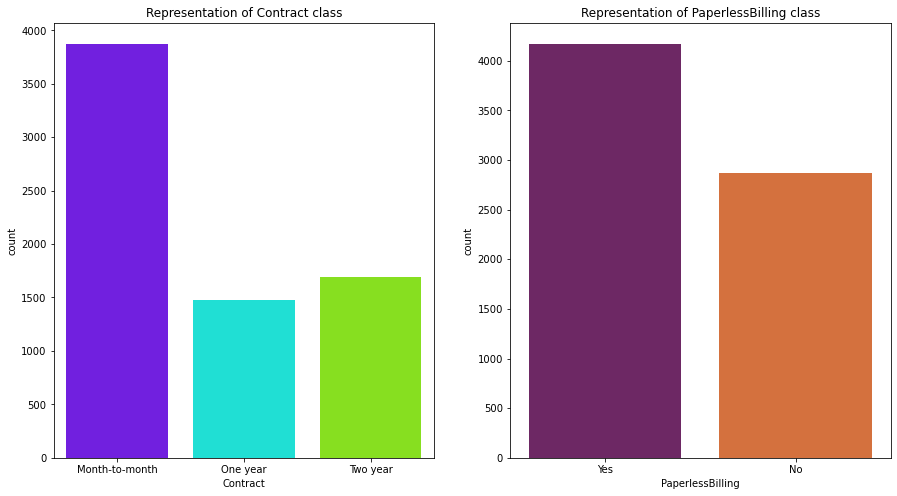

In [16]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['Contract'],palette='hsv_r')
plt.title('Representation of Contract class')


ax = plt.subplot(1,2,2)
sns.countplot(df['PaperlessBilling'],palette='inferno')
plt.title('Representation of PaperlessBilling class')

plt.show()

#### 1. 54% of customer choose Month-to-month contract, and 22% choose for 1 year contract,24% choose 2 year contract.
#### 2. 42%  customer go for paper billing and 58% go for paperless billing.

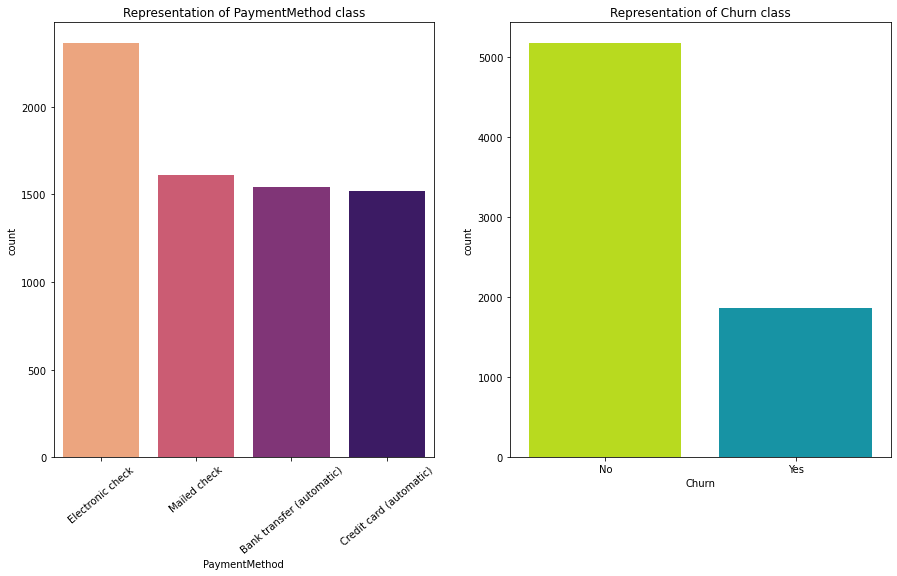

In [17]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(df['PaymentMethod'],palette='magma_r')
plt.xticks(rotation=40)
plt.title('Representation of PaymentMethod class')


ax = plt.subplot(1,2,2)
sns.countplot(df['Churn'],palette='nipy_spectral_r')
plt.title('Representation of Churn class')

plt.show()

#### 1. 27% of overall customer have churned and 73% of customer have not churned. The target data is unbalanced and it need to be treated.
#### 2. Nearly 32% of payments have been done through electronic check, around 22-25%  by other methods(Mailed check, Bank transfer, Creditcard)

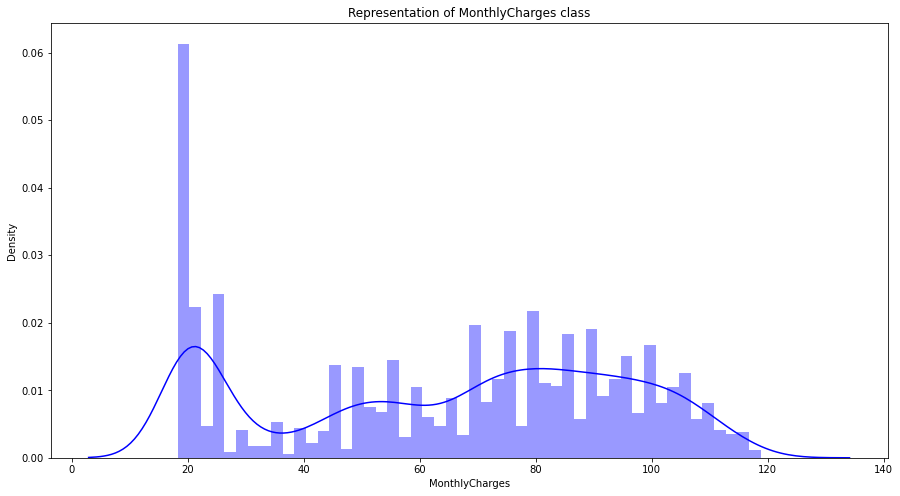

In [18]:
plt.figure(figsize=(15,8), facecolor='white')
sns.distplot(df['MonthlyCharges'], norm_hist=True,bins=50, color='blue')
plt.title('Representation of MonthlyCharges class')
plt.show()

## Bivariate Analysis

### Let us check the relationship of all features with target variables.

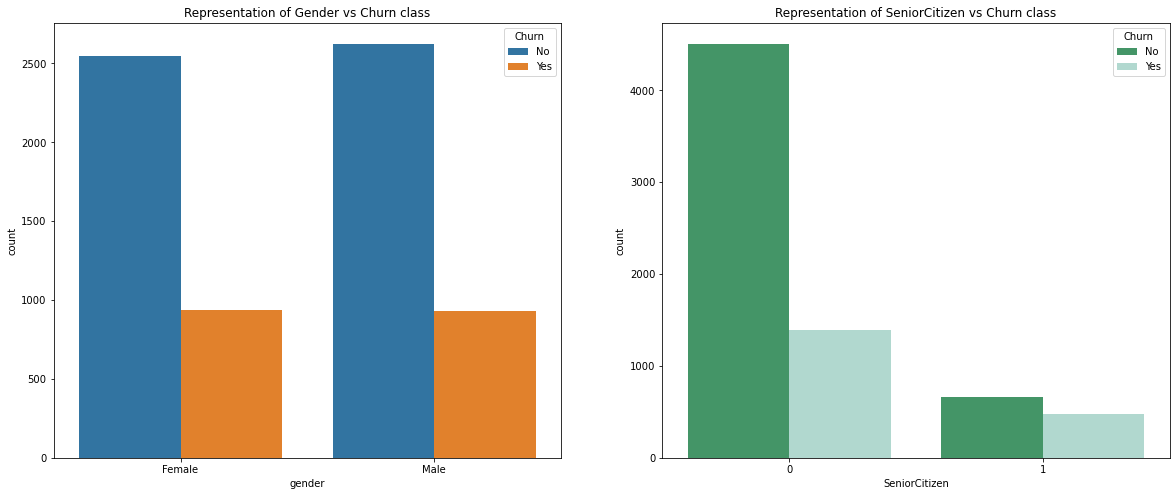

In [19]:
plt.figure(figsize=(20,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Representation of Gender vs Churn class')

ax = plt.subplot(1,2,2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df,palette='BuGn_r')
plt.title('Representation of SeniorCitizen vs Churn class')

plt.show()

#### Out of 5901, 29% of non-senior customers and 30 % of senior customer have churned.

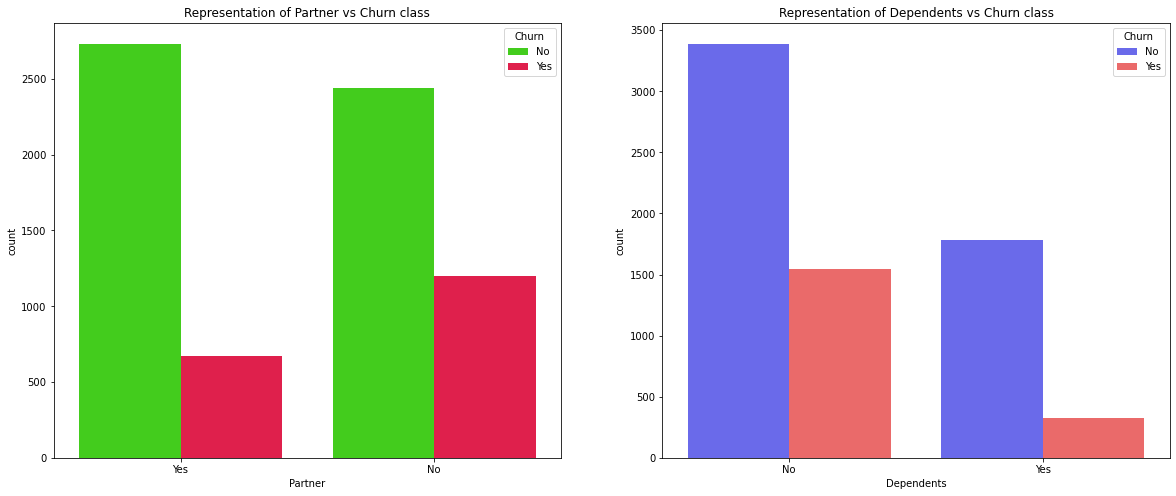

In [20]:
plt.figure(figsize=(20,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(x='Partner', hue='Churn', data=df, palette='prism')
plt.title('Representation of Partner vs Churn class')

ax = plt.subplot(1,2,2)
sns.countplot(x='Dependents', hue='Churn', data=df,palette='seismic')
plt.title('Representation of Dependents vs Churn class')

plt.show()

#### 1. 22% of people having parters and 36% of people not having partners have churned.
#### 2. 16% of people having dependents have churned.

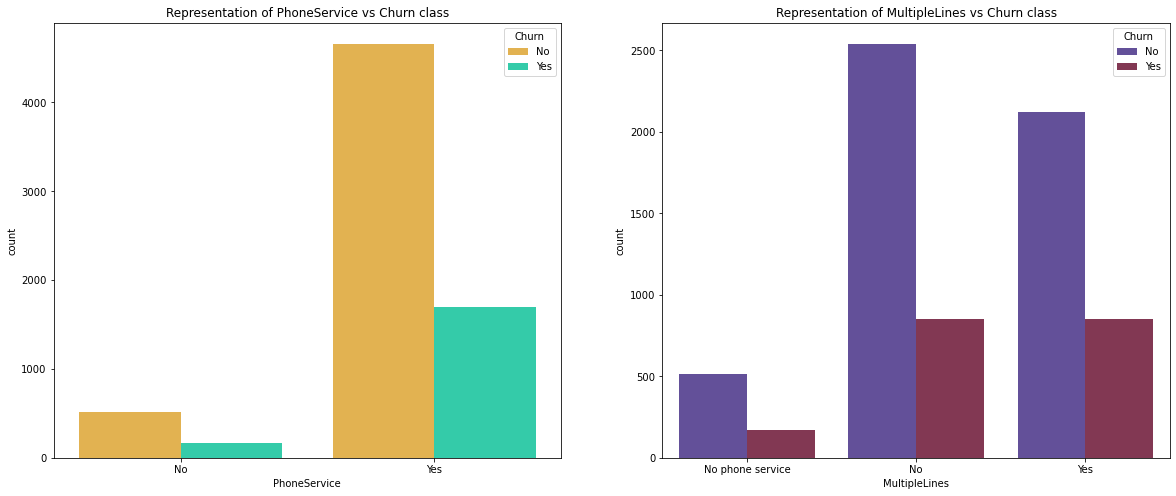

In [21]:
plt.figure(figsize=(20,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(x='PhoneService', hue='Churn', data=df, palette='turbo_r')
plt.title('Representation of PhoneService vs Churn class')

ax = plt.subplot(1,2,2)
sns.countplot(x='MultipleLines', hue='Churn', data=df,palette='twilight')
plt.title('Representation of MultipleLines vs Churn class')

plt.show()

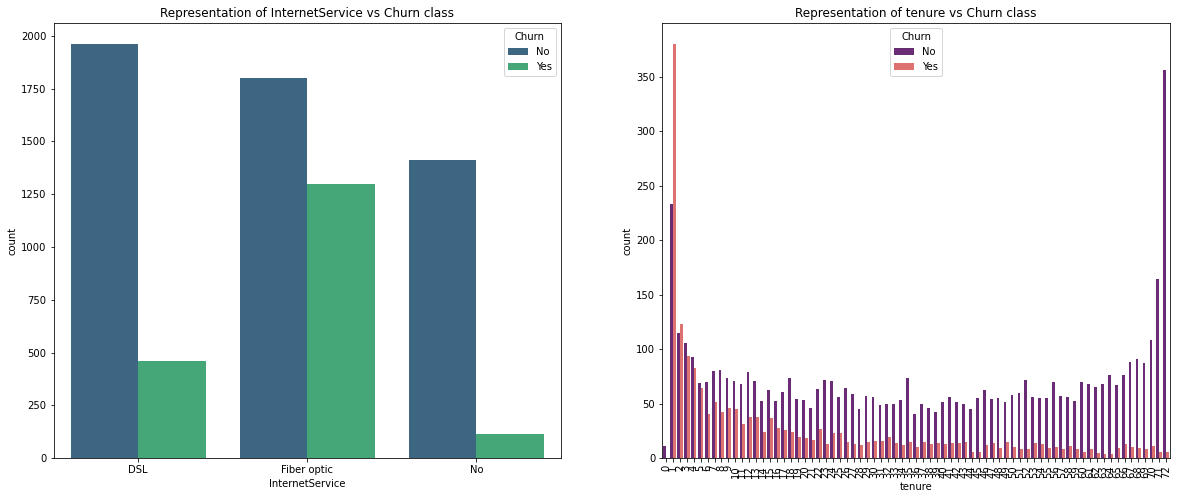

In [22]:
plt.figure(figsize=(20,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(x='InternetService', hue='Churn', data=df, palette='viridis')
plt.title('Representation of InternetService vs Churn class')

ax = plt.subplot(1,2,2)
sns.countplot(x='tenure', hue='Churn', data=df,palette='magma')
plt.xticks(rotation=90)
plt.title('Representation of tenure vs Churn class')

plt.show()

#### 1. People who opted for Fiber Optics Internet service have highest churn percentage, need to check if there is issue with this service.
#### 2. The people <30 seems to move out at higher rate than that >30 tenure.

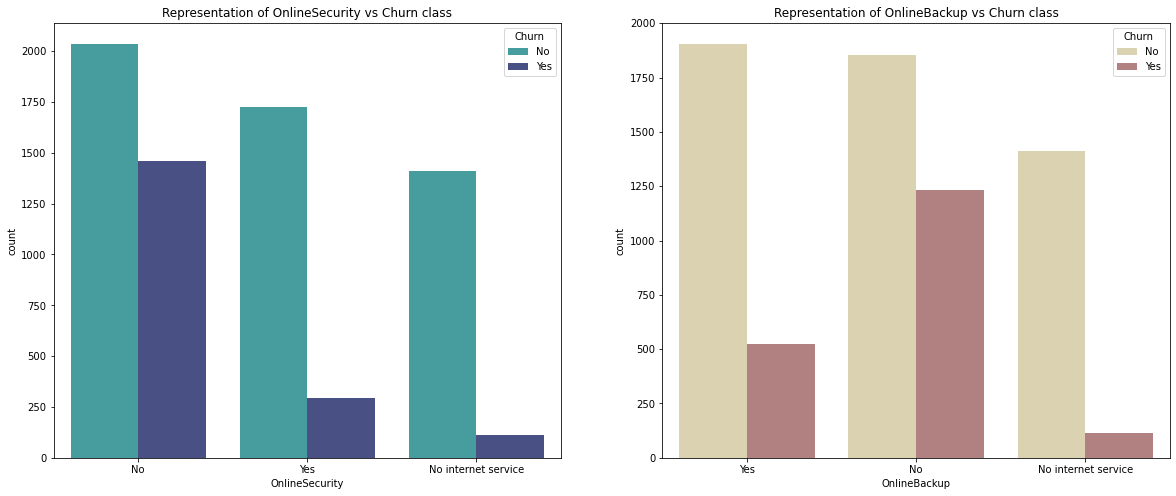

In [23]:
plt.figure(figsize=(20,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette='mako_r')
plt.title('Representation of OnlineSecurity vs Churn class')

ax = plt.subplot(1,2,2)
sns.countplot(x='OnlineBackup', hue='Churn', data=df,palette='pink_r')
plt.title('Representation of OnlineBackup vs Churn class')

plt.show()

#### We can infere that people who not opted above 2 services seem to have churned more, we can think of developing more ideas in order to attract and make people to choose these service.

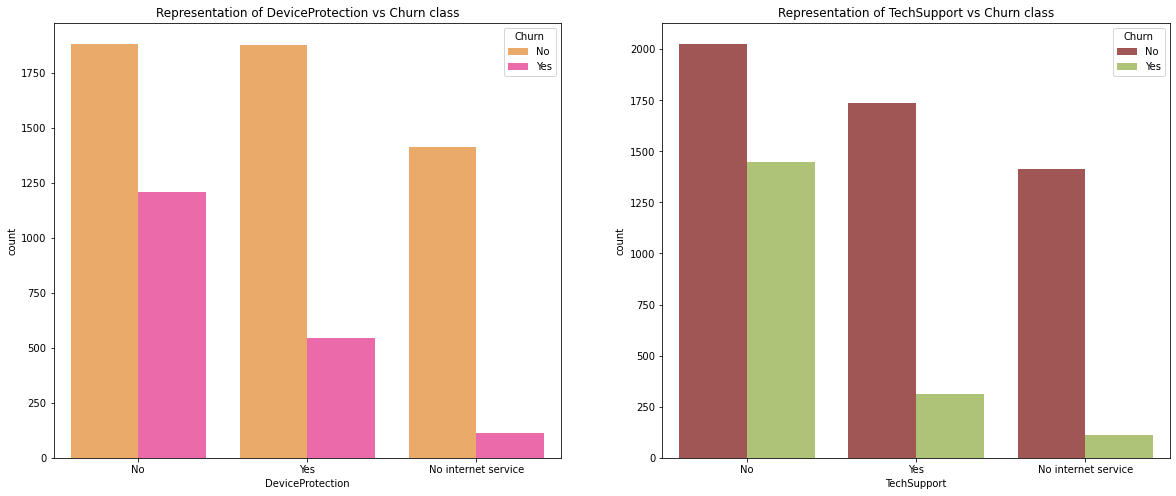

In [24]:
plt.figure(figsize=(20,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(x='DeviceProtection', hue='Churn', data=df, palette='spring_r')
plt.title('Representation of DeviceProtection vs Churn class')

ax = plt.subplot(1,2,2)
sns.countplot(x='TechSupport', hue='Churn', data=df,palette='tab20b_r')
plt.title('Representation of TechSupport vs Churn class')

plt.show()

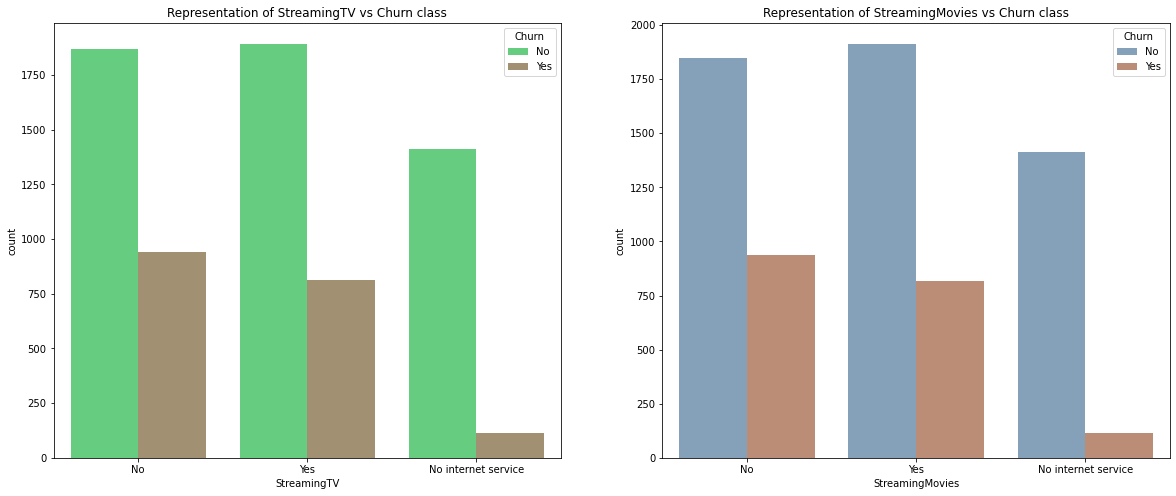

In [25]:
plt.figure(figsize=(20,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(x='StreamingTV', hue='Churn', data=df, palette='terrain')
plt.title('Representation of StreamingTV vs Churn class')

ax = plt.subplot(1,2,2)
sns.countplot(x='StreamingMovies', hue='Churn', data=df,palette='twilight_shifted')
plt.title('Representation of StreamingMovies vs Churn class')

plt.show()

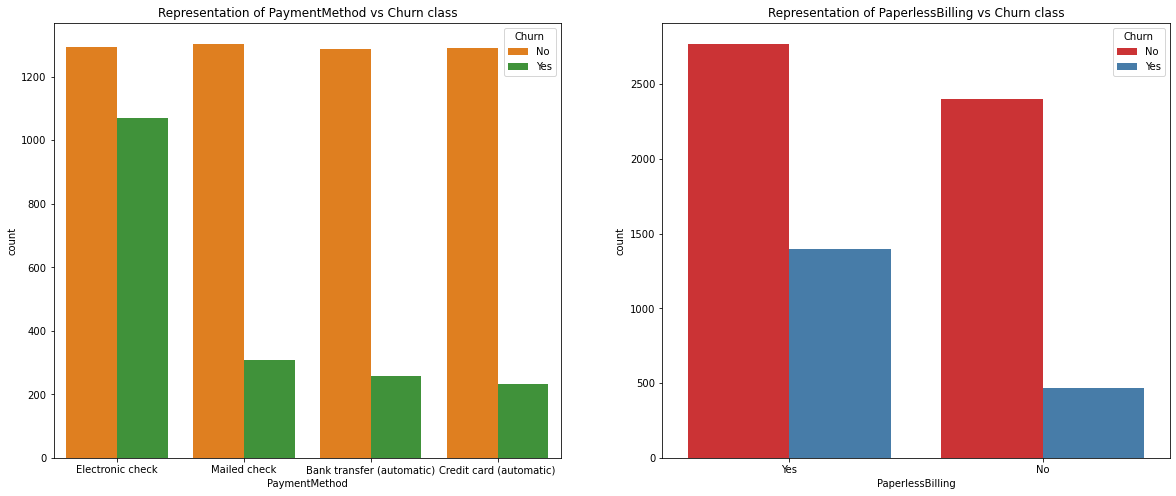

In [26]:
plt.figure(figsize=(20,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Paired_r')
plt.title('Representation of PaymentMethod vs Churn class')

ax = plt.subplot(1,2,2)
sns.countplot(x='PaperlessBilling', hue='Churn', data=df,palette='Set1')
plt.title('Representation of PaperlessBilling vs Churn class')

plt.show()

#### 1. People who choose credit card method seems to stay more than those of electronic check method.
#### 2. People who choose TV, Movies streaming services having higher ratio of churn. Need to focus on improvising in this area.

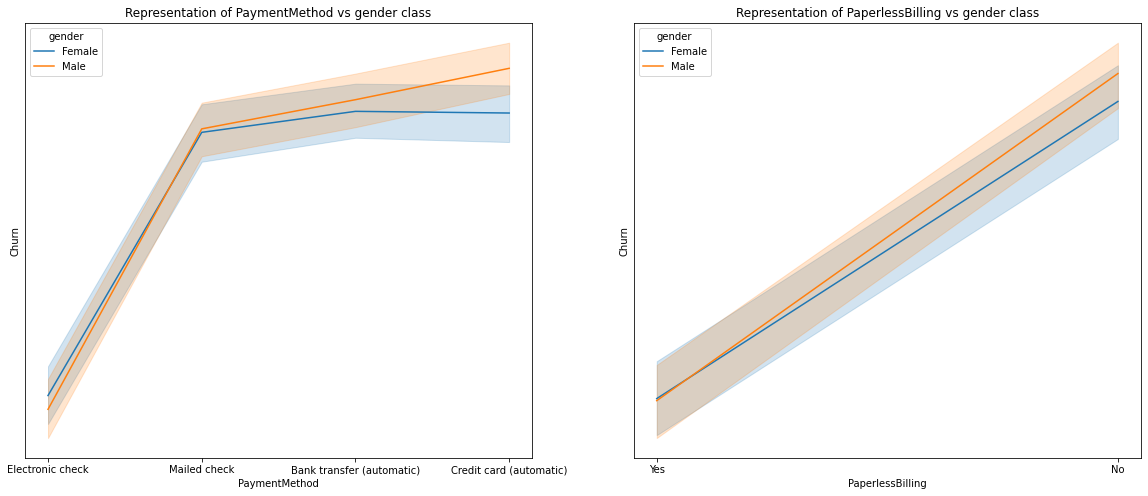

In [27]:
plt.figure(figsize=(20,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.lineplot(x='PaymentMethod', y='Churn',hue='gender', data=df,)
plt.title('Representation of PaymentMethod vs gender class')

ax = plt.subplot(1,2,2)
sns.lineplot(x='PaperlessBilling', y='Churn',hue='gender', data=df)
plt.title('Representation of PaperlessBilling vs gender class')

plt.show()

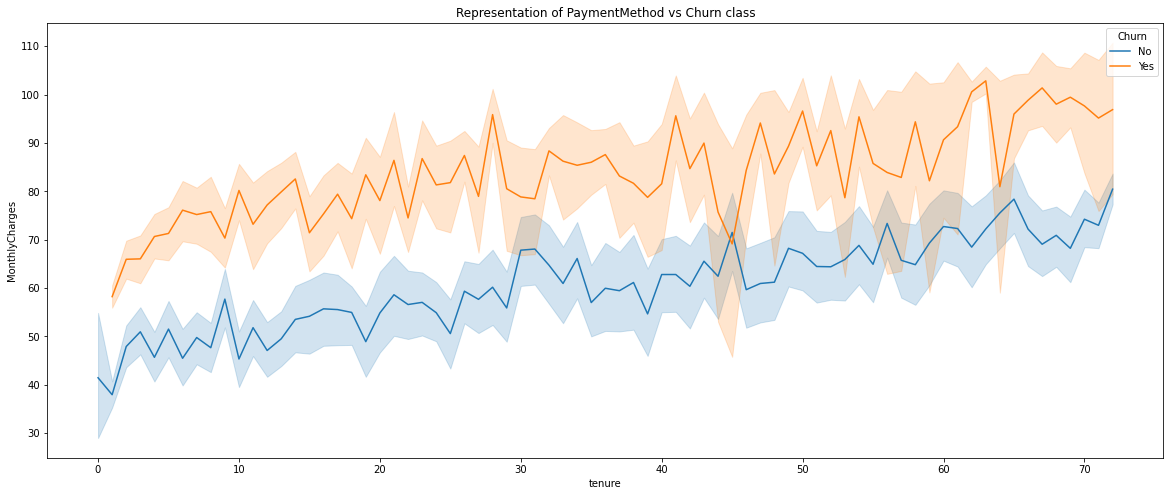

In [28]:
plt.figure(figsize=(20,8), facecolor='white')
sns.lineplot(y='MonthlyCharges',x='tenure',hue='Churn', data=df)
plt.title('Representation of PaymentMethod vs Churn class')
plt.show()

#### The monthly charges have been increase all over the tenures except at 2 spikes, but over all growth is positce.

<Figure size 1440x576 with 0 Axes>

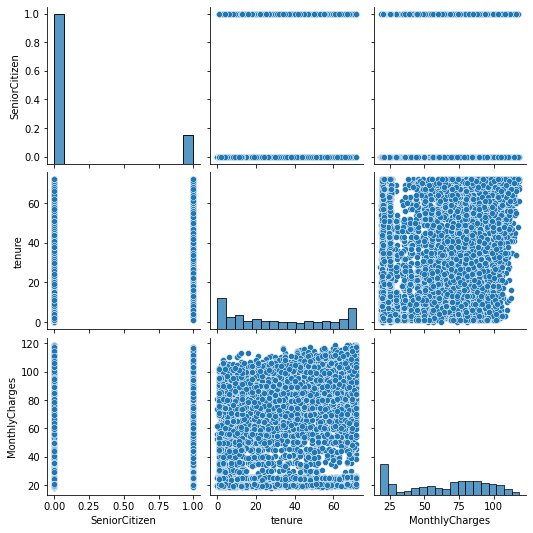

In [29]:
plt.figure(figsize=(20,8), facecolor='white')
sns.pairplot(data=df) 
plt.show()

## Observations:

#### 1. We have Gender, Partner,  Dependents, PhoneService,PaperlessBilling, Churn with 2 values(Yes, No), Let us replace them by 1 and 0 respectively.
#### 2. MultipleLines, InternetService, OnlineBackup, OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract have 3 values which are to be One hot Encoded.
#### 3. PaymentMethod has 4 values to be encoded.

#### 4. As the customer ID column is having all unique values indicating ID, no use for analysis.

In [30]:
#attributes having only 2 different values
df['gender'].replace({'Male':1, 'Female':0}, inplace=True)
df['Partner'].replace({'Yes':1, 'No':0}, inplace=True)
df['Dependents'].replace({'Yes':1, 'No':0}, inplace=True)
df['PhoneService'].replace({'Yes':1, 'No':0}, inplace=True)
df['PaperlessBilling'].replace({'Yes':1, 'No':0}, inplace=True)
df['Churn'].replace({'Yes':1, 'No':0}, inplace=True)

#attributes having 3 values
df['MultipleLines'] =df['MultipleLines'].apply(lambda x:1 if x=='Yes' else 0)
df['InternetService'].replace({'Fiber optic':1,'DSL':2, 'No':0}, inplace=True)
df['OnlineBackup'] =df['OnlineBackup'].apply(lambda x:1 if x=='Yes' else 0)
df['OnlineSecurity'] =df['OnlineSecurity'].apply(lambda x:1 if x=='Yes' else 0)
df['DeviceProtection'] =df['DeviceProtection'].apply(lambda x:1 if x=='Yes' else 0)
df['TechSupport'] =df['TechSupport'].apply(lambda x:1 if x=='Yes' else 0)
df['StreamingTV'] =df['StreamingTV'].apply(lambda x:1 if x=='Yes' else 0)
df['StreamingMovies'] =df['StreamingMovies'].apply(lambda x:1 if x=='Yes' else 0)

contract = pd.get_dummies(df['Contract'], drop_first=True) 
paymnt = pd.get_dummies(df['PaymentMethod'], drop_first=True) 
df = df.join([contract, paymnt])

df.drop(columns=['customerID','Contract','PaymentMethod'], inplace=True)

df.shape

(7043, 23)

In [31]:
df.dtypes

gender                       int64
SeniorCitizen                int64
Partner                      int64
Dependents                   int64
tenure                       int64
PhoneService                 int64
MultipleLines                int64
InternetService              int64
OnlineSecurity               int64
OnlineBackup                 int64
DeviceProtection             int64
TechSupport                  int64
StreamingTV                  int64
StreamingMovies              int64
PaperlessBilling             int64
MonthlyCharges             float64
TotalCharges                object
Churn                        int64
One year                     uint8
Two year                     uint8
Credit card (automatic)      uint8
Electronic check             uint8
Mailed check                 uint8
dtype: object

In [32]:
#we see total charges is numerical data but it is categorical datatype, let us check if it has any hidden null values
print(df.loc[df['TotalCharges']==' '].index)

#dropping all the empty space values from column
df.drop(df.loc[df['TotalCharges']==' '].index, inplace=True)

#resetting the index values after dropping the empty spaces from column
df = df.reset_index()
df.drop(columns=['index'], inplace=True)
print("After removing the empty records from Dataset, the shape of dataset")
df.shape

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
After removing the empty records from Dataset, the shape of dataset


(7032, 23)

In [33]:
#converting the categorical column into float
df['TotalCharges'] = df['TotalCharges'].astype('float')

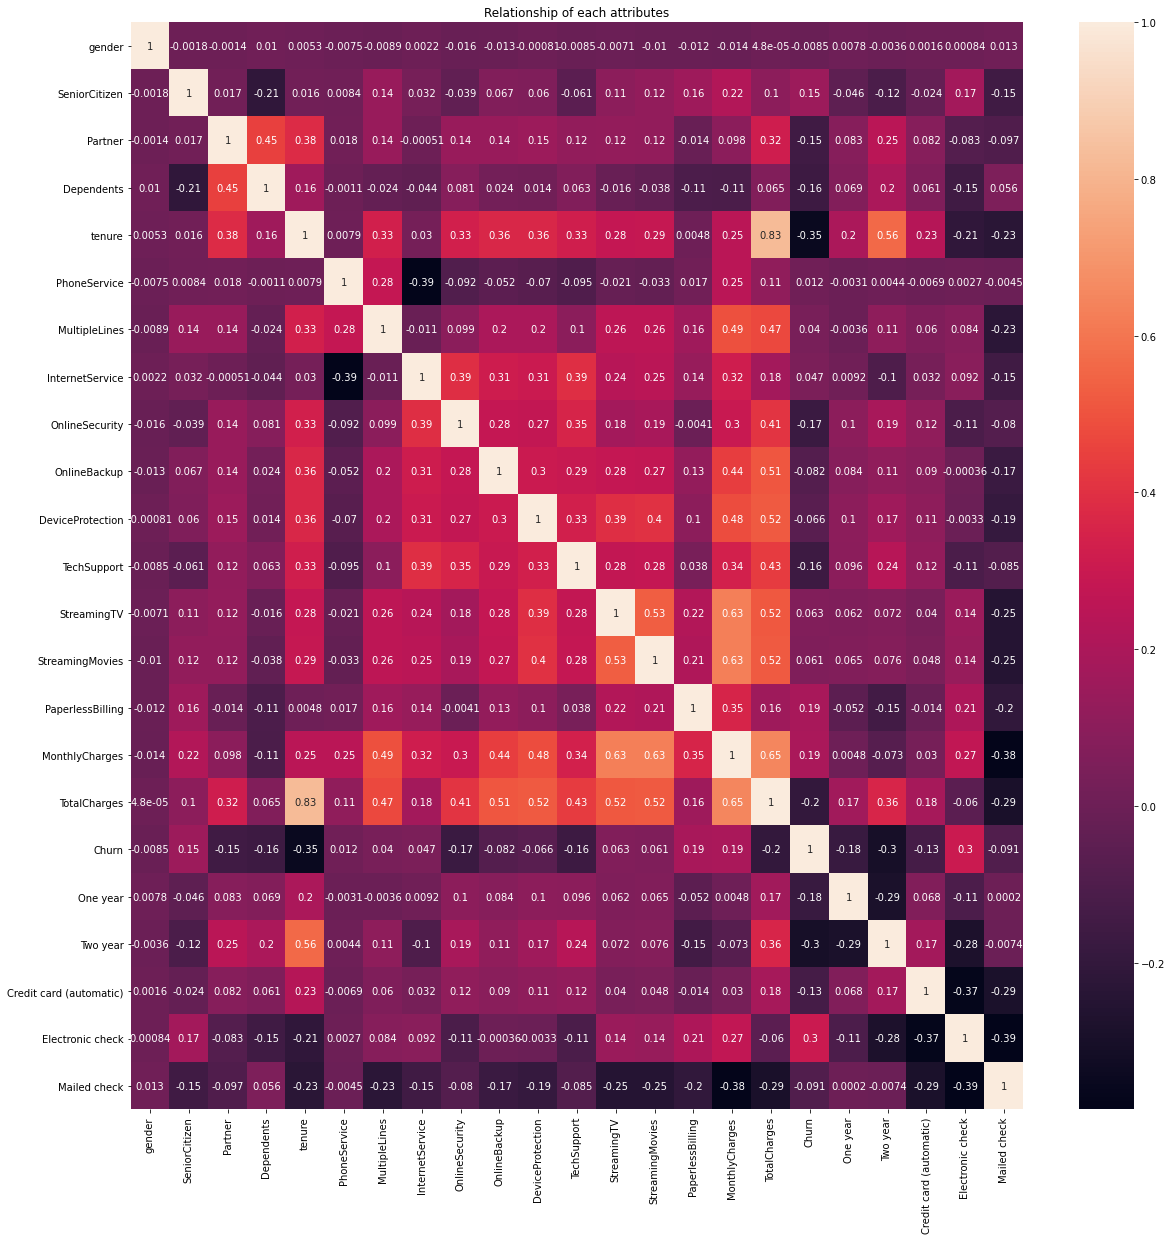

In [34]:
corr = df.corr()
plt.figure(figsize=(20,20), facecolor='white')
sns.heatmap(corr, annot=True)
plt.title("Relationship of each attributes")
plt.show()

In [35]:
#checking for the skewness in the data
df.skew()

gender                    -0.018776
SeniorCitizen              1.831103
Partner                    0.070024
Dependents                 0.880908
tenure                     0.237731
PhoneService              -2.729727
MultipleLines              0.316232
InternetService           -0.205704
OnlineSecurity             0.944373
OnlineBackup               0.652954
DeviceProtection           0.657594
TechSupport                0.925245
StreamingTV                0.475441
StreamingMovies            0.458191
PaperlessBilling          -0.377503
MonthlyCharges            -0.222103
TotalCharges               0.961642
Churn                      1.060622
One year                   1.429263
Two year                   1.220270
Credit card (automatic)    1.378433
Electronic check           0.693048
Mailed check               1.296249
dtype: float64

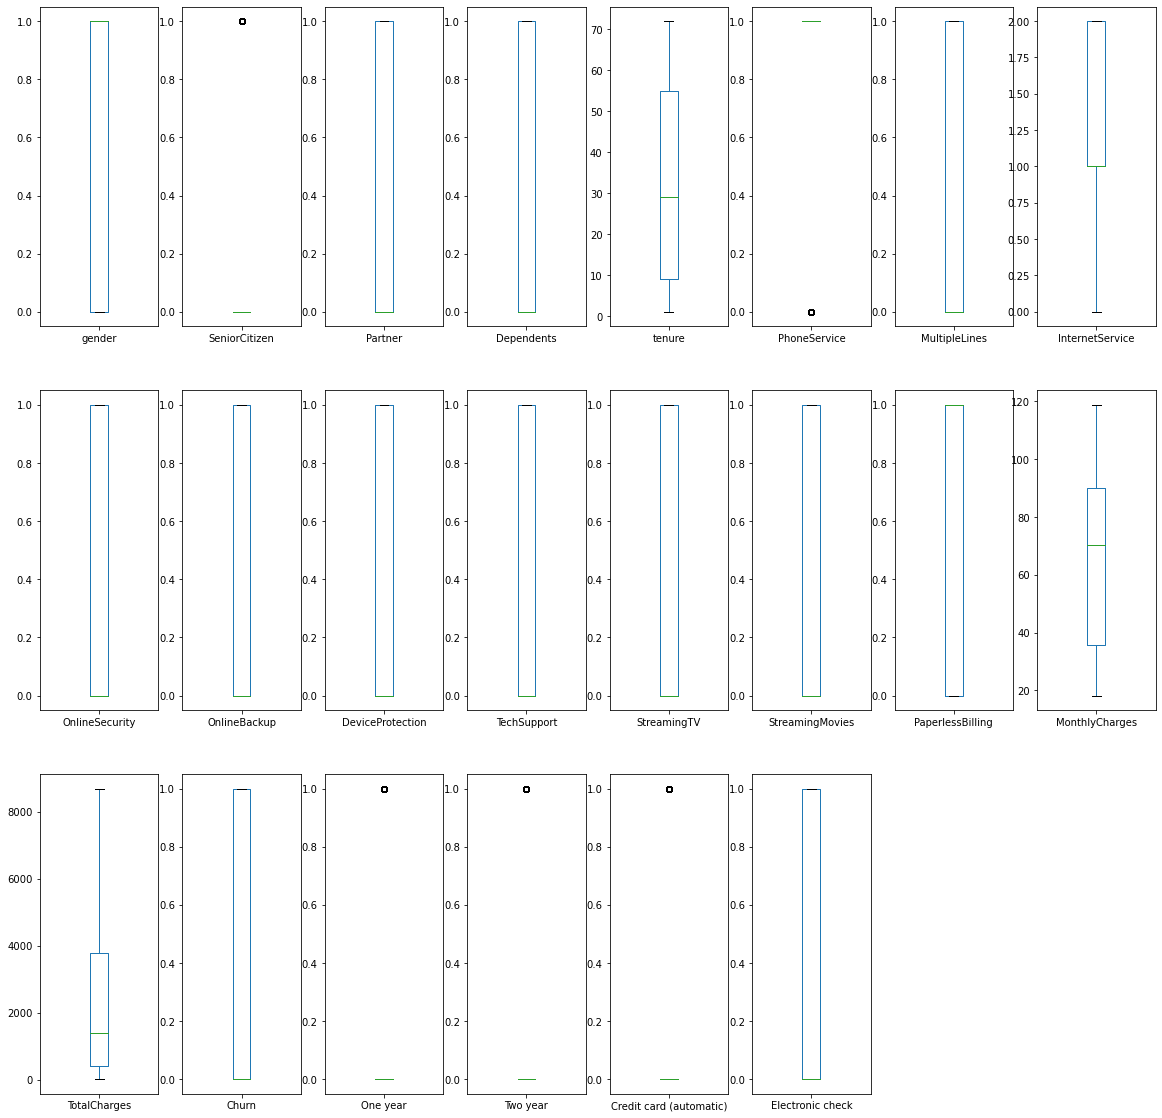

In [36]:
plt.figure(figsize=(20,20), facecolor='white') 
pltnum=1
for i in df:
    if pltnum<23:
        ax= plt.subplot(3,8,pltnum)
        df.boxplot(column=i, grid=False)
        pltnum+=1
plt.show()

#### There are few negative skewed attributes and very few outliers are present in the dataset.

#### Let us try to remove the skewness and outliers by applying some techniques below.

In [37]:
#zscore method

col = df[['TotalCharges','InternetService','MonthlyCharges']]
z_score = zscore(col)
abs_sco = np.abs(z_score)

fltr = (abs_sco<3).all(axis=1)
df = df[fltr]

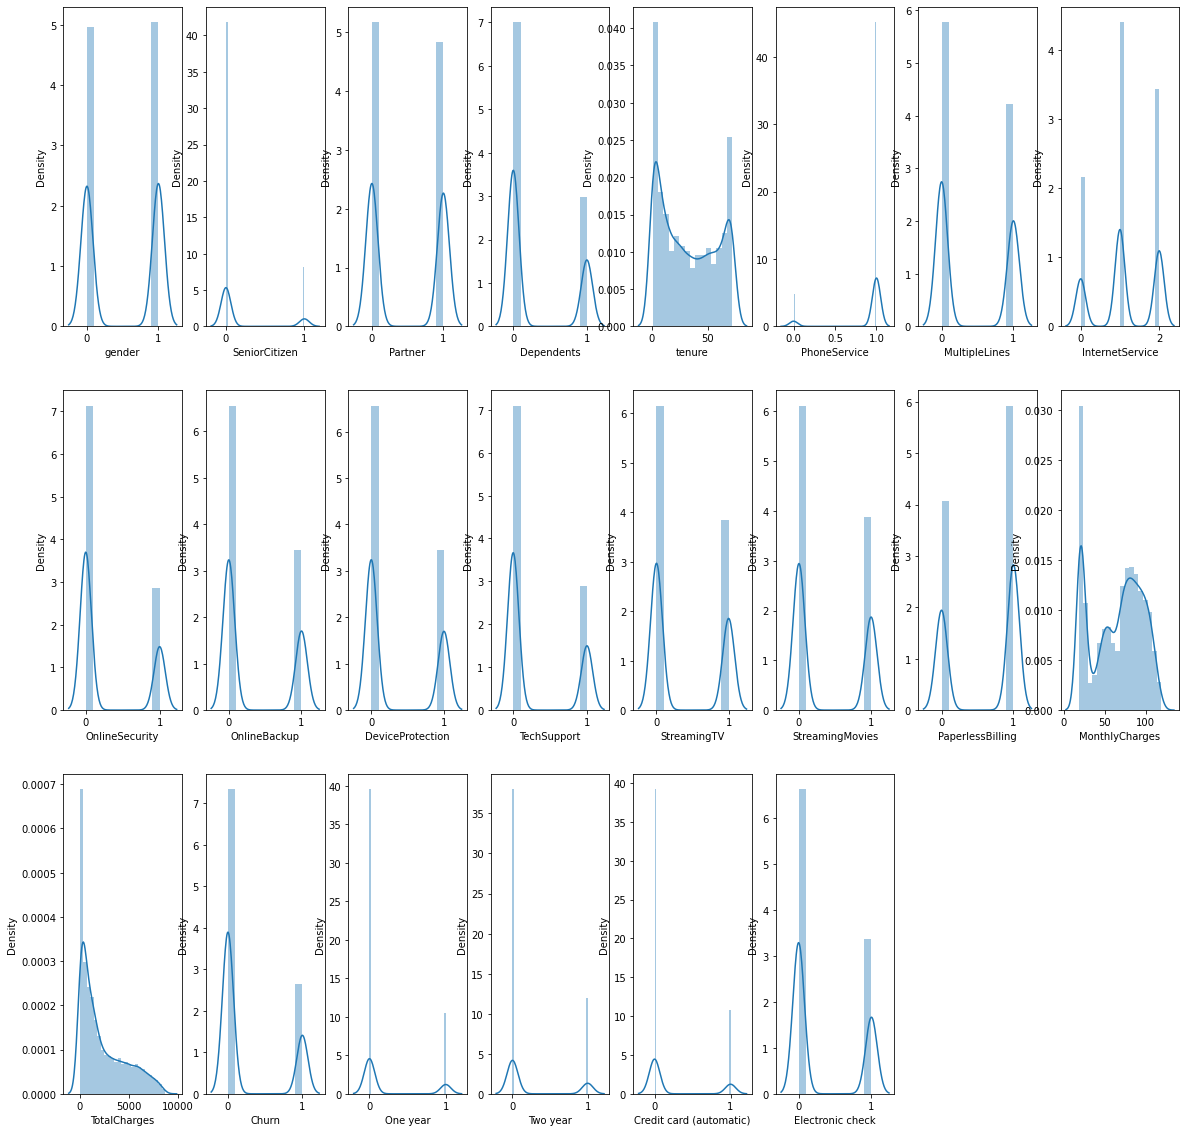

In [38]:
#cheking the skewness and outliers using dist plot

plt.figure(figsize=(20,20), facecolor='white') 
pltnum=1
for i in df:
    if pltnum<23:
        ax= plt.subplot(3,8,pltnum)
        sns.distplot(df[i])
        pltnum+=1
plt.show()

#### 1. Only TotalCharges has some skewness in the data,and there are no outliers that could affect the model performance.

#### 2. Let us analyse the correlation of the attributes,and check how are each column contributing to model performance.

## Feature Selection:

Let us split the Features and Label seperately and analyse which are the important features that are impacting more and which are having less importance using VIF technique.

In [39]:
#splitting the data

X = df.drop('Churn', axis=1)
y = df['Churn']

In [40]:
# Using RandomOverSampling Analysis to balance the datasets

print('Before sampling \n',X.shape)
print('Before sampling \n',y.value_counts())

ran_samp = RandomOverSampler()
X, y  = ran_samp.fit_resample(X,y)

print('After sampling \n',X.shape)
print('After sampling \n',y.value_counts())

Before sampling 
 (7032, 22)
Before sampling 
 0    5163
1    1869
Name: Churn, dtype: int64
After sampling 
 (10326, 22)
After sampling 
 0    5163
1    5163
Name: Churn, dtype: int64


In [41]:
#Checking the importance of the attributes

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['vif']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


vif

,Features,vif
0,gender,1.985318
1,SeniorCitizen,1.419143
2,Partner,2.570107
3,Dependents,1.837069
4,tenure,16.068040
5,PhoneService,14.590183
6,MultipleLines,2.690749
7,InternetService,5.230860
8,OnlineSecurity,1.882311
9,OnlineBackup,2.121867


####  VIF score less than 5 indicates that there is no multicollinearity in between the attributes, VIF score higher than 5 ('tenure','Phoneservice','MonthlyCharges','TotalCharges') will need to be treated by removing single column from the data.

###  1. Let us drop tenure and Monthly charges and check the VIF score again

In [42]:
X = X.drop(columns=['tenure','MonthlyCharges'])
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['vif']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,Features,vif
0,gender,1.972708
1,SeniorCitizen,1.398217
2,Partner,2.509678
3,Dependents,1.833559
4,PhoneService,6.493118
5,MultipleLines,2.499568
6,InternetService,4.513456
7,OnlineSecurity,1.837077
8,OnlineBackup,2.030182
9,DeviceProtection,2.105554


#### Now Data seems stable to proceed further 

## Model Building

### Let us standardize our data

In [43]:
scalar = StandardScaler()
X_scaler = scalar.fit_transform(X)

#### Let us select the best Random state which provides best accuracy for the selected model

In [44]:
max_ac =0
maxRS=0

for i in range(2,200):
    X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, random_state=i, test_size=0.25)
    model = LogisticRegression()
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    if acc> max_ac:
        max_ac=acc
        maxRS=i
        
print("The max accuracy obtained is {} for the Random State {}".format(max_ac, maxRS))

The max accuracy obtained is 0.7664601084430674 for the Random State 182


In [45]:
#splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, random_state=129, test_size=0.25)

## 1. Logistic Regression

*******************RESULTS*******************
The accuracy score of train is : 74.35433884297521
The accuracy score test is : 75.91014717273431
The cross validation score is : 74.405901615279
Confusion Matrix: 
 [[ 899  405]
 [ 217 1061]]
Classification                precision    recall  f1-score   support

           0       0.81      0.69      0.74      1304
           1       0.72      0.83      0.77      1278

    accuracy                           0.76      2582
   macro avg       0.76      0.76      0.76      2582
weighted avg       0.77      0.76      0.76      2582

***********************************************


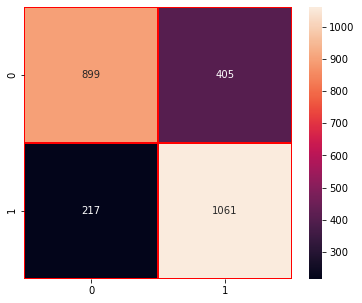

In [46]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_train = log_reg.predict(X_train)
y_pred = log_reg.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(log_reg,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

The accuracy score: 75.29 and CV score: 73.92, we can try for some more better performing models.

## 2. Random Forest Classifier

*******************RESULTS*******************
The accuracy score of train is : 99.81921487603306
The accuracy score test is : 88.45855925639039
The cross validation score is : 86.14408228698018
Confusion Matrix: 
 [[1087  217]
 [  81 1197]]
Classification                precision    recall  f1-score   support

           0       0.93      0.83      0.88      1304
           1       0.85      0.94      0.89      1278

    accuracy                           0.88      2582
   macro avg       0.89      0.89      0.88      2582
weighted avg       0.89      0.88      0.88      2582

***********************************************


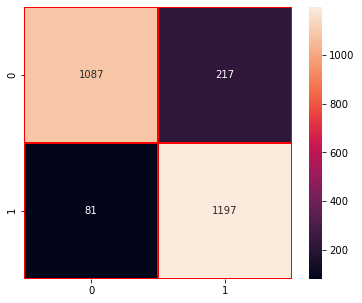

In [47]:
ran_clf = RandomForestClassifier()
ran_clf.fit(X_train, y_train)
y_pred_train = ran_clf.predict(X_train)
y_pred = ran_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(ran_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)

plt.show()

The accuracy score: 89.07 and CV score: 86.37, The accuracy and CV are too good, but high difference in values

## 3. Gradient Boosting Classifier

*******************RESULTS*******************
The accuracy score of train is : 79.17097107438018
The accuracy score test  is : 79.66692486444616
The cross validation score is : 77.54369327214523
Confusion Matrix: 
 [[ 967  337]
 [ 188 1090]]
Classification                precision    recall  f1-score   support

           0       0.84      0.74      0.79      1304
           1       0.76      0.85      0.81      1278

    accuracy                           0.80      2582
   macro avg       0.80      0.80      0.80      2582
weighted avg       0.80      0.80      0.80      2582

***********************************************


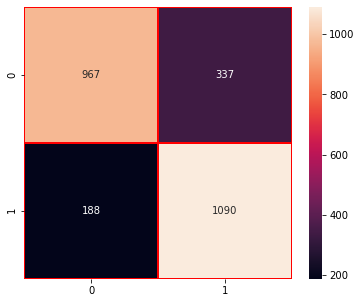

In [48]:
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
y_pred_train = grad_clf.predict(X_train)
y_pred = grad_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test  is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(grad_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5)) 
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

 The accuracy score: 78.96 and CV score: 77.64, The accuracy and CV are descent and values have less difference.

## 4. XGBoost Classifier

*******************RESULTS*******************
The accuracy score of train is : 91.76136363636364
The accuracy score test is : 84.54686289697909
The cross validation score is : 81.96007927094749
Confusion Matrix: 
 [[1018  286]
 [ 113 1165]]
Classification                precision    recall  f1-score   support

           0       0.90      0.78      0.84      1304
           1       0.80      0.91      0.85      1278

    accuracy                           0.85      2582
   macro avg       0.85      0.85      0.84      2582
weighted avg       0.85      0.85      0.84      2582

***********************************************


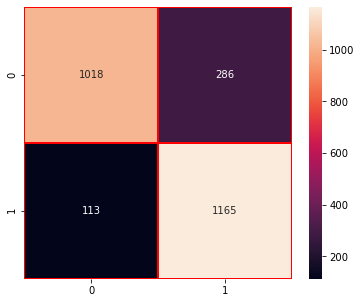

In [49]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred_train = xgb_clf.predict(X_train)
y_pred = xgb_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(xgb_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

 The accuracy score: 84.15 and CV score: 82.74, The accuracy and CV are good and values have much difference.

## 5. SVM Classifier

*******************RESULTS*******************
The accuracy score of train is : 81.65030991735537
The accuracy score test is : 79.55073586367158
The cross validation score is : 77.6084345489213
Confusion Matrix: 
 [[ 970  334]
 [ 194 1084]]
Classification                precision    recall  f1-score   support

           0       0.83      0.74      0.79      1304
           1       0.76      0.85      0.80      1278

    accuracy                           0.80      2582
   macro avg       0.80      0.80      0.80      2582
weighted avg       0.80      0.80      0.80      2582

***********************************************


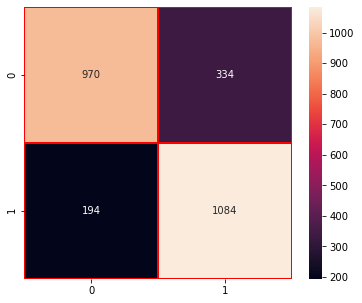

In [50]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_train = svm_clf.predict(X_train)
y_pred = svm_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(svm_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")


plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

The accuracy score: 78.73 and CV score: 77.60, The accuracy and CV are descent and values have lesser difference.

## 6. K-Neighbours Classifier

*******************RESULTS*******************
The accuracy score of train is : 83.27737603305785
The accuracy score test is : 76.45236250968242
The cross validation score is : 75.18054492103768
Confusion Matrix: 
 [[ 863  441]
 [ 167 1111]]
Classification                precision    recall  f1-score   support

           0       0.84      0.66      0.74      1304
           1       0.72      0.87      0.79      1278

    accuracy                           0.76      2582
   macro avg       0.78      0.77      0.76      2582
weighted avg       0.78      0.76      0.76      2582

***********************************************


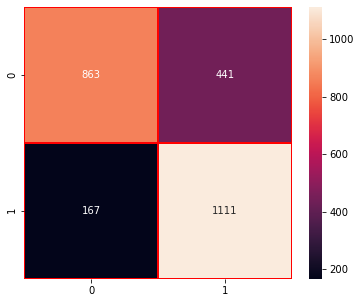

In [51]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_train = knn_clf.predict(X_train)
y_pred = knn_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(knn_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

The accuracy score: 76.45 and CV score: 75.23, The accuracy and CV are not so impressive, Let us consider for models

## 7. Gausian NB

*******************RESULTS*******************
The accuracy score of train is : 74.08316115702479
The accuracy score test is : 75.36793183578622
The cross validation score is : 73.91531253805488
Confusion Matrix: 
 [[ 883  421]
 [ 215 1063]]
Classification                precision    recall  f1-score   support

           0       0.80      0.68      0.74      1304
           1       0.72      0.83      0.77      1278

    accuracy                           0.75      2582
   macro avg       0.76      0.75      0.75      2582
weighted avg       0.76      0.75      0.75      2582

***********************************************


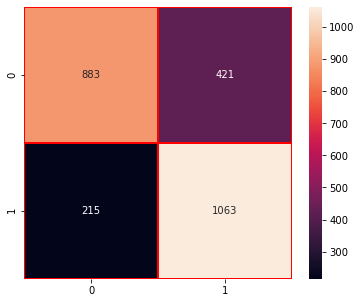

In [52]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
y_pred_train = gnb_clf.predict(X_train)
y_pred = gnb_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(gnb_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")


plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

The accuracy score: 74.3 and CV score: 73.78, The accuracy and CV are not so impressive, Let us consider for models

From the above models we see that Gausian NB and SVM algorithms have performed well, that is  cvscore and Accuracy score values have least difference. Let us tune the parameters of these models to obtain higher accuracy.

## Hyperparameter Optimization

1. KNNClassifier

In [ ]:
svc = SVC()
params= {'C':[0.1,1.0,1.5,2,2.5],
         'kernel':[ 'linear','poly', 'rbf', 'sigmoid'], 
         'random_state': list(range(0,5)), 
         'gamma':['scale', 'auto'],
         'decision_function_shape':['ovr','ovo']
         }
kn_grid = GridSearchCV(svc, param_grid=params,verbose=2, n_jobs=5)
kn_grid.fit(X_train, y_train)
kn_grid.best_params_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


In [ ]:
svc = SVC(C=2.5, decision_function_shape='ovr', gamma='scale',kernel='rbf',random_state=15)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)


print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(svc,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")


plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()



In [ ]:
gaus = GaussianNB()
params= {'var_smoothing': np.logspace(0,-10,num=100)}
gaus = GridSearchCV(gaus, param_grid=params,cv=5,scoring='accuracy',verbose=2, n_jobs=5)
gaus.fit(X_train, y_train)
gaus.best_params_

In [ ]:
gaus = GaussianNB(var_smoothing=0.00599)

gaus.fit(X_train, y_train)
y_pred_train = gaus.predict(X_train)
y_pred = gaus.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(gaus,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")


plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()



# Plotting the Graphs:

In [ ]:
plt.figure(figsize=(15,15,))
graph = plot_roc_curve(svc,X_test, y_pred)  
plot_roc_curve(ran_clf,X_test, y_pred, ax=graph.ax_)
plot_roc_curve(xgb_clf,X_test, y_pred, ax=graph.ax_)
plt.show()


After the Hyper parameter tuning we got the accuracy nearly to be equal to that of previous one, From the graph we can see that SVC and XGBClassifier are giving the same area under the curve. Hence Let us save SVC as best model

## Saving the Best Model:

In [ ]:
import pickle

file = open('Customer Churn Analysis.pkl','wb')

pickle.dump(svc, file)